In [2]:
import pandas as pd
from pandas import Series, DataFrame

titanic_df = pd.read_csv("/Users/earleaguilar/DataSets/train.csv")

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# If we want to find out the informantion on the dataset
# Here we see that some categories are not cokmpleter
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

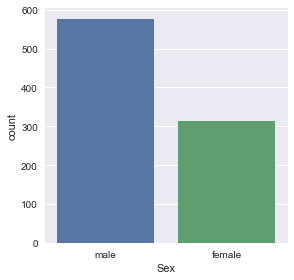

In [5]:
# Here we determine the distribution of females and males 
# aboard the titanic

sns.factorplot('Sex',data=titanic_df, kind='count')

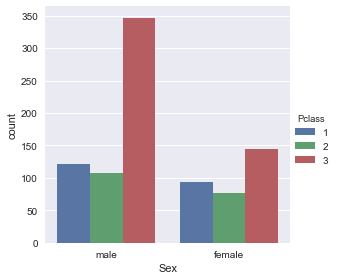

In [6]:
# Here we see the distribution of females and males aboard
# according to passengers class
sns.factorplot('Sex', data=titanic_df, hue='Pclass', kind='count')

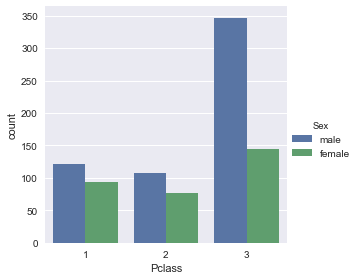

In [7]:
# We can get the same information in as nicer format 
# as follows

sns.factorplot('Pclass', data=titanic_df, hue='Sex', kind='count')

# This plot seperates by class shows the count of females vs males  

In [8]:
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else: 
        return sex
   
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [9]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


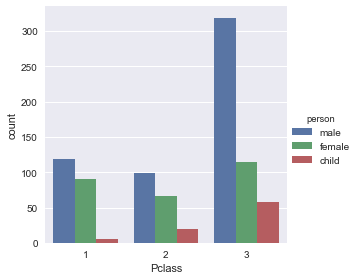

In [10]:
# Here we plot the distribution of females, males, and children
sns.factorplot('Pclass', data=titanic_df, hue='person', kind='count')

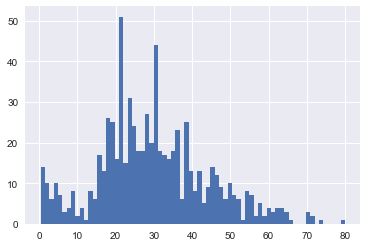

In [11]:
# The histogram of ages in the title
titanic_df['Age'].hist(bins=70)

In [12]:
# We can just get the sum of the types of people on the titanic
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

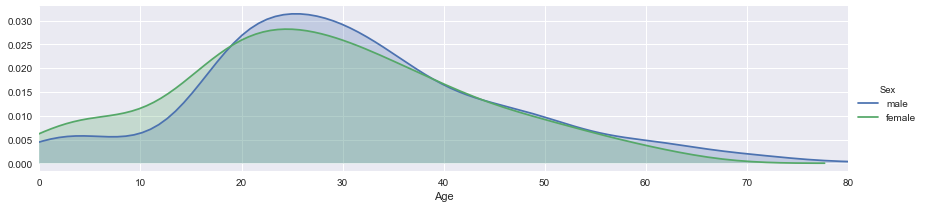

In [13]:
# Here we determine the distribution of ages of the males and females
# on the titanic.

fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)

fig.map(sns.kdeplot, 'Age' , shade=True)

oldest = titanic_df['Age'].max()

# Setting the limits
fig.set(xlim=(0,oldest))

# This is how to add a legen
fig.add_legend()

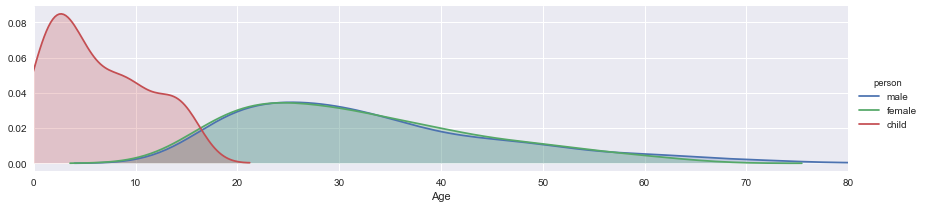

In [14]:
# Here we show the age distribution but do so for the "person" 
# categorie

fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

# Setting the limits
fig.set(xlim=(0,oldest))

# This is how to add a legend
fig.add_legend()

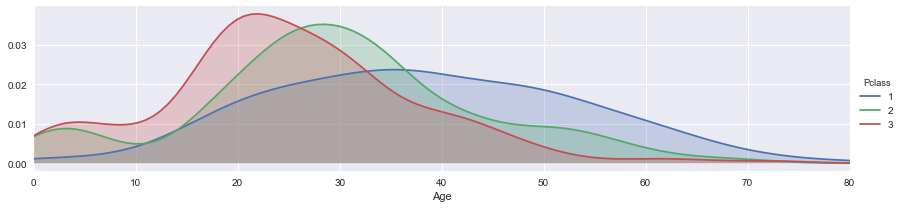

In [15]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)

fig.map(sns.kdeplot,'Age', shade=True)

oldest = titanic_df['Age'].max()

# Setting the limits
fig.set(xlim=(0,oldest))

fig.add_legend()

In [16]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [17]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

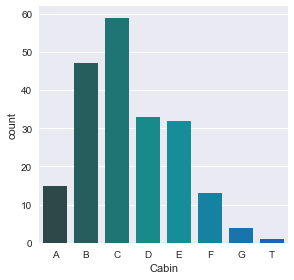

In [18]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']

sns.factorplot('Cabin', data=cabin_df.sort_values('Cabin'), palette='winter_d', kind='count')

# Here the value of T does not make sense so we have to drop it

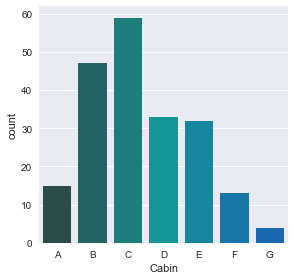

In [19]:
cabin_df = cabin_df[cabin_df['Cabin'] != 'T']
sns.factorplot('Cabin', data=cabin_df.sort_values('Cabin'), palette='winter_d', kind='count')

In [20]:
# There are more palettes than this one and can be found on the 
# following link

url = "http://matplotlib.org/users/colormaps.html"

In [21]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


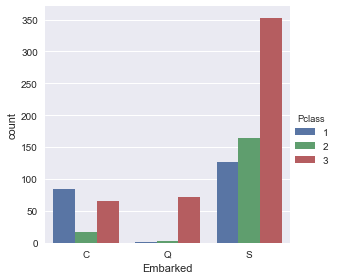

In [22]:
# Here the embarked column contains the letters S, C, and Q which stand for 
# Southhampton, Cherbourg, and Queenstown respectively

sns.factorplot('Embarked',data=titanic_df, kind='count',
               hue='Pclass',order=['C','Q','S'])

In [23]:
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [24]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0]  = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0]  = 'Alone'


# Note it's okay to ignore an  error that sometimes pops up here. For more info check out this link
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


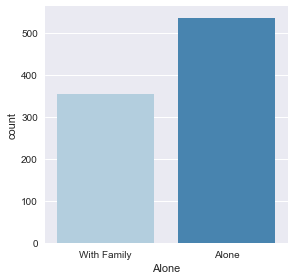

In [26]:
sns.factorplot('Alone', data=titanic_df, palette='Blues', kind='count')

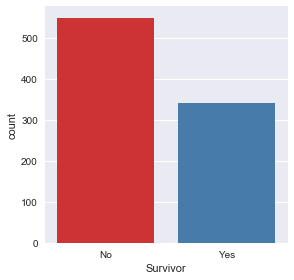

In [27]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No', 1:'Yes'})

sns.factorplot('Survivor', data=titanic_df, palette='Set1', kind='count')

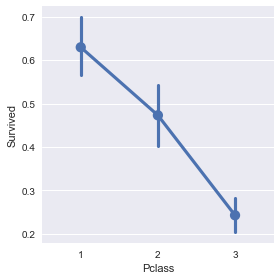

In [28]:
sns.factorplot('Pclass','Survived', data=titanic_df)

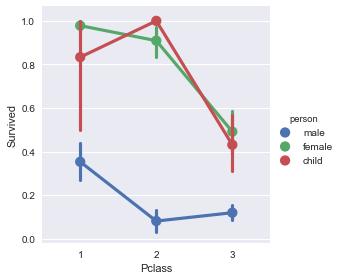

In [29]:
sns.factorplot('Pclass','Survived', data=titanic_df, hue='person')

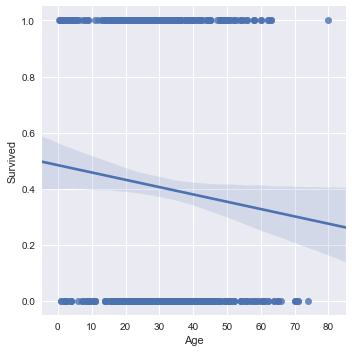

In [30]:
sns.lmplot('Age', 'Survived', data=titanic_df)

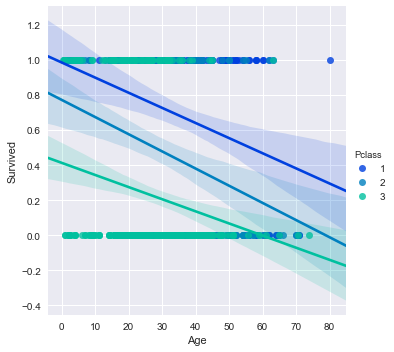

In [31]:
sns.lmplot('Age', 'Survived', data=titanic_df, hue='Pclass', palette='winter')

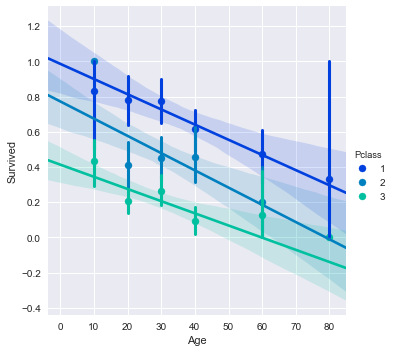

In [32]:
generations = [10,20,30,40,60,80]

sns.lmplot('Age','Survived', hue='Pclass', data=titanic_df, palette='winter', x_bins=generations)

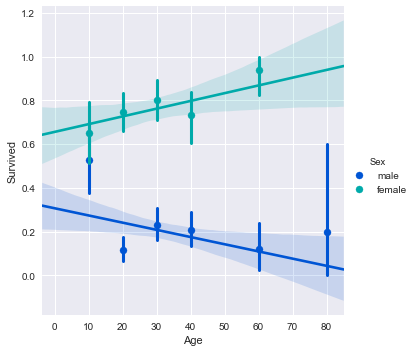

In [33]:
sns.lmplot('Age','Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)

In [34]:
cabin_df['Survived'] = titanic_df['Survived']
cabin_df['Age'] = titanic_df['Age']

In [35]:
cabin_df.head()

,Cabin,Survived,Age
0,C,0,22.0
1,C,1,38.0
2,E,1,26.0
3,G,1,35.0
4,C,0,35.0


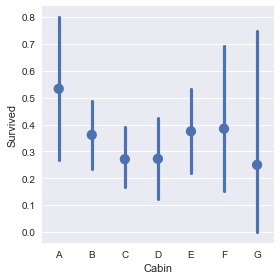

In [42]:
sns.factorplot('Cabin', 'Survived',data=cabin_df.sort_values('Cabin'), join=False)

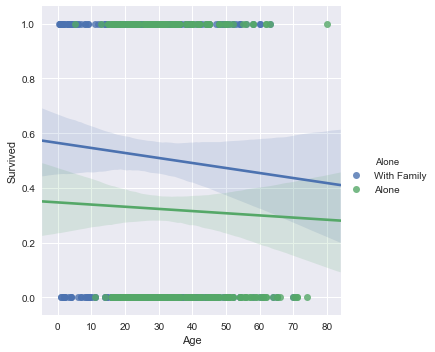

In [37]:
# This graph tells us that if a male or female were alone
# Then as they get older their chance of survival diminishes
# however if one is with family they start off with a higher
# chance of surviving the younger they are.
sns.lmplot('Age', 'Survived',data=titanic_df, hue='Alone')

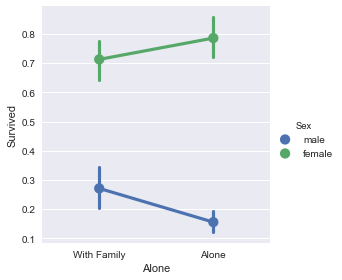

In [45]:
# This plot is simply whether one survived alone
# or with family seperated by males and females and
# we can see that the relationship is inversly proportional
# Males with Family are more likely to survive than males
# without, but females with family are less likely to survive
# than females that are alone.

sns.factorplot('Alone', 'Survived', data=titanic_df, hue='Sex')

In [40]:
cabin_df.head()

,Cabin,Survived,Age
0,C,0,22.0
1,C,1,38.0
2,E,1,26.0
3,G,1,35.0
4,C,0,35.0
